# 베이지안 통계

##  Example 
- 동전을 던지고 그 결과를 추측한다.
    - 앞면이 나올 것이라고 추측하는가?
    - 내가 동전을 던지면서 슬쩍 동전을 훔쳐보았다면 나와 여러분의 추측은 어떻게 다른가? 
    
    
- 어느 환자에게 증상 x, y, z가 나타나고 있다. 세가지 증상을 모두 유발하는 질병은 많지만 병명은 하나일 것이다. 
    - 한 의사가 어떤 병이라고 믿더라도 두 번째 의사는 다른 믿음을 가지고 있을지도 모른다.

##  사전확률과 사후확률
-  <font color=blue> 사전확률(Prior Probability) </font>
    - 동전 앞면이 나올 확률: $P(A) = 0.5$ 
    - 전통적인 확률의 개념
- <font color=blue> 사후확률(Posterior Probability) </font>
    - 나는 동전이 앞으로 떨어지는 것을 봤다: 사건 $X$
    - 내가 생각하는 앞면이 나올 확률: $P(A|X)= 1$
    - 증거(데이터)를 관찰한 후 확률을 업데이트하여 추측이 **덜 틀리게(불확실성이 작아지게)** 만드는 것

## 빈도주의자 vs 베이지안
- 빈도주의자(Frequentist)
    - 확률은 사건이 장기적으로 일어나는 빈도
    - 모수(parameter)는 고정된 상수 (하지만 우리는 모르는...)

- 베이지안 (Bayesian)
    - 확률은 사건 발생에 대한 믿음 또는 확신의 척도 (주관적)
    - 모수는 확률적으로 변하는 수 (확률변수)
    

   
- 증거(데이터)의 개수가 무한대면 $N\rightarrow \infty$ 빈도주의자의 결론 = 베이지안의 결론 
    - $N$이 작을 때 사전확률을 도입함으로써 불확실성을 유지 
 

## 베이즈 정리 (Bayes' Theorem) 
### 조건부 확률 

\begin{align}
 P( X|A ) &=   \frac{P(X\cap A)}{P(A)} 
\end{align}


### 베이즈 정리 
사상 $A_1, A_2, \cdots, A_n$이 표본공간 $S$의 분할이며 $P(A_i)>0, P(X)>0$이면 다음의 관계식이 성립한다. 

$$ P(A_k|X) = \frac{P(A_k \cap X)}{P(X)} = \frac{P(A_k) P(X|A_k)}{\sum_{i=1}^n P(A_i) P(X|A_i)}  \propto P(A_k) P(X|A_k) $$ 

- $P(A_k)$: $A_k$의 사전 확률 (prior probability)
- $P(A_k|X)$: X가 주어질 때 $A_k$의 사후확률 (posterior probability)
- $P(X|A_k)$: $A_k$가 주어질 때 X의 우도 (likelihood)
- $P(X)$: X가 발생할 확률 - normalizing constant

#### 확률밀도함수(혹은 확률질량함수)로 표현한 베이즈 정리
<br>
$$ p(\theta|y) = \frac{p(y|\theta)\pi(\theta)}{p(y)} \propto p(y|\theta)\pi(\theta) $$

- $\theta$: frequentist 방법에서 주로 추정의 대상이 되는 모수 
    - 정규분포의 $\mu, \sigma^2$, 이항분포의 $p$ 등 
- $y$: 관측된 데이터 
- $\pi(\theta)$: $\theta$의 사전분포
- $p(y|\theta)$: y의 우도함수 
- $p(\theta|y)$: $\theta$의 사후분포  

## 2.2 Example: 동전 던지기 

- 동전의 앞면이 나올 확률을 $\theta$라고 하자. $\theta$가 무엇인지 아무 정보가 없다고 가정한다. (즉, 0과 1사이의 무작위 수일 것이라고 믿음) 
- 동전을 두번 던졌는데 두번 다 앞면이 나왔다. 그렇다면 $\theta$ 값에 대한 믿음을 어떻게 변화했을까? 

    - $\pi(\theta) = 1, 0\leq \theta \leq 1$
    - 관측치: 2번 시행(n=2) 중 2번 앞면(y=2)이 나옴
    - $p(y|\theta) \propto \theta^y (1-\theta)^{n-y}$ 
    - $p(\theta|y) \propto \theta^{y} (1-\theta)^{n-y} \propto Beta(y+1, n-y+1) $ <font color=green>

- 모형을 다시 표현하자면 아래와 같다.
$$ \theta \sim Unif(0,1) $$
$$ y|\theta \sim Bin(n,\theta) $$
$$ \Rightarrow \theta |y \sim Beta(y+1, n-y+1) $$

##### 실험: 두 번 던져서 앞면이 두번 나온 경우 

In [ ]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(5,3)
import scipy.stats as stats

dist = stats.beta # posterior density 
n_trial = 2 # 2번 시행 
np.random.seed(seed=0) # random seed 고정
data = stats.bernoulli.rvs(0.5, size=n_trial) # Bernoulli(0.5)에서 random number 추출

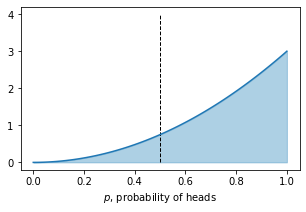

In [ ]:
x = np.linspace(0, 1, 100)
heads = data.sum() # 앞면의 개수 
y = dist.pdf(x, 1 + heads, 1 + n_trial - heads) # 데이터를 사용하여 posterior density 계산 


plt.plot(x, y, label="observe %d tosses,\n %d heads" % (n_trial, heads))
plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
plt.xlabel("$p$, probability of heads") 
plt.show()

- 앞면이 2번 연속 발생하니 동전 앞면이 나올 확률(p)에 대한 믿음이 1로 매우 치우쳐짐

##### 동전을 던지는 시행 횟수를 늘리면 어떻게 될까? 

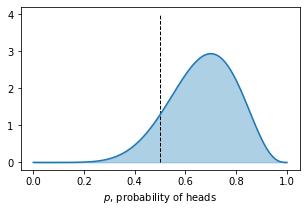

In [ ]:
n_trial = 10
np.random.seed(seed=0) # random seed 고정
data = stats.bernoulli.rvs(0.5, size=n_trial) # Bernoulli(0.5)에서 random number 추출

x = np.linspace(0, 1, 100)
heads = data.sum() # 앞면의 개수 
y = dist.pdf(x, 1 + heads, 1 + n_trial - heads) # 데이터를 사용하여 posterior density 계산 


plt.plot(x, y, label="observe %d tosses,\n %d heads" % (n_trial, heads))
plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
plt.xlabel("$p$, probability of heads") 
plt.show()

- 시행 수를 늘리니 실제 데이터가 추출된 베르누이 분포의 모수값인 0.5에 보다 가까이 분포하는 사후분포를 얻음 

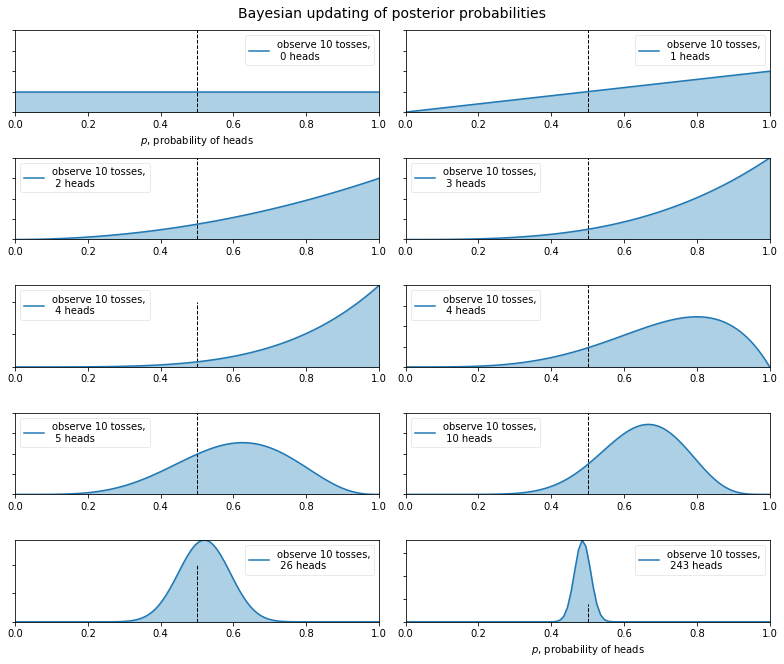

In [ ]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)
figsize(11,9)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials)/2), 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (n_trial, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

- n이 커질 수록 사후 확률이 0.5 주변에 점점 가까워짐
- 곡선의 너비가 넓을 수록 불확실성이 커짐
- 곡선이 언제나 0.5를 중심으로 하고 있는 것은 아님

### Frequentist(빈도주의자) vs. Bayesian(베이지안)
동전을 5번 던져서 3번 앞면이 나왔다고 하자.
- Frequentist
    - 앞면이 나올 확률을 3/5로 추정 
- Bayesian 
    - 사후분포가 Beta(4, 3)
    $$ \theta \sim Unif(0,1) $$
$$ y|\theta \sim Bin(n,\theta) $$
$$ \Rightarrow \theta |y \sim Beta(y+1, n-y+1) $$
    - 사후분포에서 랜덤 샘플을 추출하여 그 평균과 분산, 혹은 중위수 등으로 추론 


In [ ]:
# posterior : beta(4,3) -> mean: 4(4+3) 이론적인 posterior mean
np.random.seed(0)
x1 = stats. beta.rvs(4,3, size = 10000)

In [ ]:
x1

array([0.70812489, 0.86181194, 0.5056505 , ..., 0.59433562, 0.37616447,
       0.82609626])

In [ ]:
4/(4+3)

0.5714285714285714

In [ ]:
x1.mean()

0.5756311856309096